In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import a subset of the character-predictions data set focused on major houses
url = '/Users/ibt119/Code/datascienceclass/sfdat22_work/project/character-predictions-9.csv'
df = pd.read_csv(url, sep=',')

((df['alive'] >= .5) == df['isAlive']).mean()
# Get rid of previous prediction info
df.drop(['actual','pred','alive','plod'],axis=1,inplace=True)
df

,S.No,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,4,0,House Arryn,0,0,0,0,0,1,1,0,0,0,0.183946,0
1,309,0,House Arryn,0,0,0,1,0,1,0,1,1,0,0.080268,1
2,313,0,House Arryn,1,0,0,0,0,0,0,0,0,0,0.006689,1
3,341,1,House Arryn,1,0,0,0,0,0,0,0,0,0,0.003344,1
4,548,1,House Arryn,0,0,0,1,1,0,0,0,0,0,0.016722,1
5,738,0,House Arryn,0,0,0,1,1,0,0,0,0,0,0.013378,1
6,766,0,House Arryn,0,0,0,1,1,0,0,0,0,0,0.010033,1
7,990,0,House Arryn,0,0,1,1,0,0,1,0,0,0,0.083612,0
8,1015,1,House Arryn,0,1,0,1,0,0,1,0,0,0,0.046823,0
9,1118,1,House Arryn,0,0,0,1,0,0,1,1,1,0,0.043478,1


In [233]:
def get_house(value):
    value = value.lower()
    v = [k for (k, v) in house.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

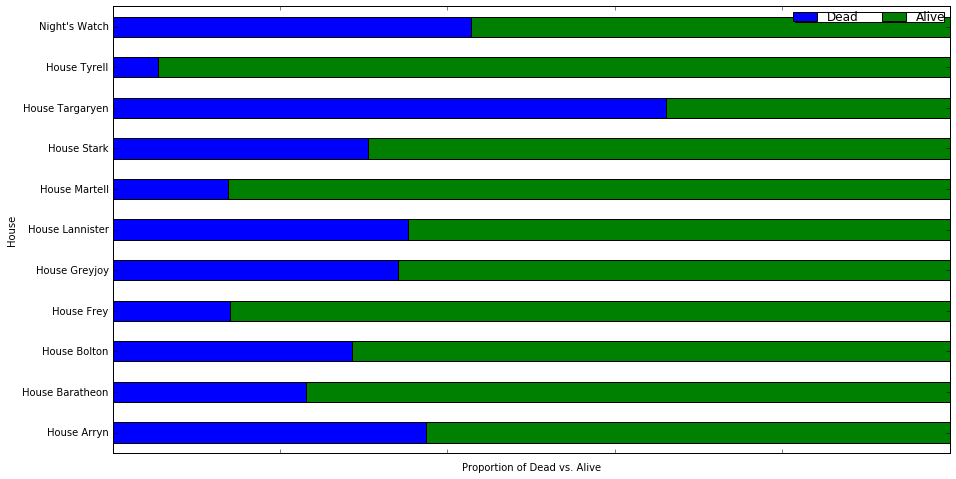

In [234]:
# Q: Which house has the highest proportion of deaths?
# A: Targaryens. 
data = df.groupby(["house", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 8), width = .5)
_ = p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12., loc = "upper right", ncol = 2, borderpad = -.15)
_ = p.set_ylabel("House"), p.set_xlabel("Proportion of Dead vs. Alive")

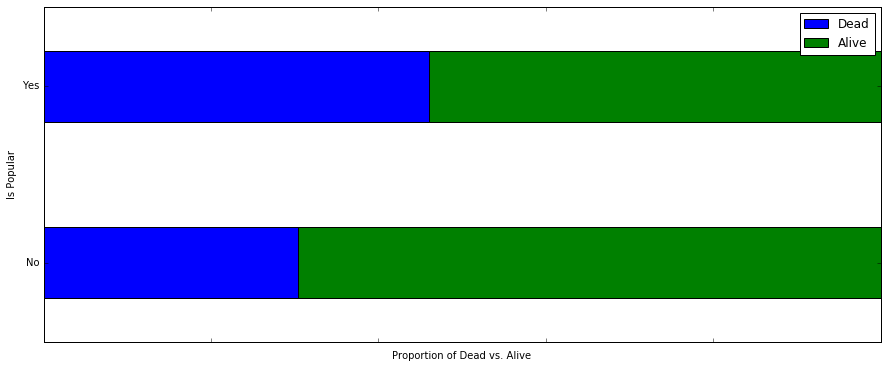

In [235]:
# Q: Is there a relationship between survival and popularity? 
# A: A higher proportion of popular characters die
data = df.groupby(["isPopular", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 6), width = .4)
_ = p.set_yticklabels(["No", "Yes"]), p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12.)
_ = p.set_ylabel("Is Popular"), p.set_xlabel("Proportion of Dead vs. Alive")

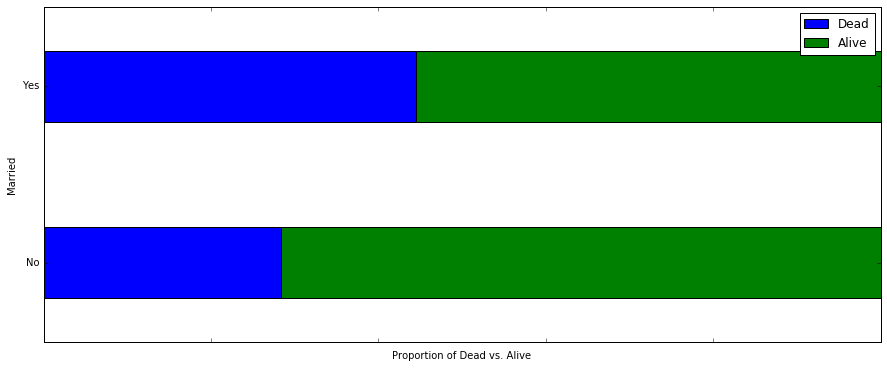

In [236]:
# Q: Is there a relationship between survial and marriage? 
# A: More of the dead characters were married than single.  
data = df.groupby(["isMarried", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 6), width = .4)
_ = p.set_yticklabels(["No", "Yes"]), p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12.)
_ = p.set_ylabel("Married"), p.set_xlabel("Proportion of Dead vs. Alive")

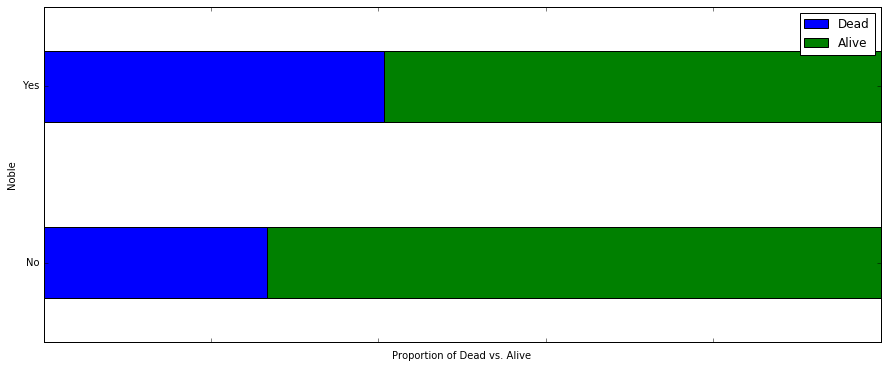

In [237]:
# Q: Is there a relationship between survial and being noble? 
# A: More of the dead characters were noble.  
data = df.groupby(["isNoble", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = data.div(data.sum(axis = 1), axis = 0).plot.barh(stacked = True, rot = 0, figsize = (15, 6), width = .4)
_ = p.set_yticklabels(["No", "Yes"]), p.set_xticklabels(""), p.legend(["Dead", "Alive"], fontsize = 12.)
_ = p.set_ylabel("Noble"), p.set_xlabel("Proportion of Dead vs. Alive")

In [238]:
### Logistic Regression

# character data
import pandas as pd
url = '/Users/ibt119/Code/datascienceclass/sfdat22_work/project/character-predictions-9.csv'
train = pd.read_csv(url)

In [239]:
# before splitting, just predict the mean of the entire dataset
train['isAlive'].sum()/float(train.shape[0]) # null accuracy

0.6817359855334539

In [240]:
# Turn house categorical variable into numeric
df_house = pd.get_dummies(df['house'])

# Join the dummy variables to the main dataframe
df_new = pd.concat([df, df_house], axis=1)
df_new = df_new.drop('house', axis=1)

In [208]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
# from sklearn import metrics
# import statsmodels.formula.api as smf
# from sklearn.cross_validation import cross_val_score

# create X and y
X = df_new.drop(['isPopular', 'S.No', 'isAlive', 'isMarried', 'isNoble', 'boolDeadRelations',], axis=1)
y = df_new['isAlive']

lg = LogisticRegression()
print cross_val_score(lg, X, y, cv=10, scoring='accuracy').mean()

nb = MultinomialNB()
print cross_val_score(nb, X, y, cv=10).mean()

ln = LinearRegression()
print np.sqrt(abs(cross_val_score(ln, X, y, cv=10, scoring='mean_squared_error').mean()))

0.998148148148
0.80136002886
0.0439629835152


In [209]:
# Try splitting the data more times
lg = LogisticRegression()
print cross_val_score(lg, X, y, cv=100).mean()

nb = MultinomialNB()
print cross_val_score(nb, X, y, cv=100).mean()

ln = LinearRegression()
print np.sqrt(abs(cross_val_score(ln, X, y, cv=100, scoring='mean_squared_error').mean()))

0.9975
0.838
0.0455260124101


In [219]:
# Decision tree
import pandas as pd
train = df_new

In [220]:
# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.isAlive.mean()

In [221]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(train.isAlive, train.prediction))

0.46580256714855517

In [222]:
train.shape

(553, 30)

In [223]:
# define X and y
feature_cols = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations', 'popularity']
X = df_new[feature_cols]
y = df_new.isAlive

In [224]:
# instantiate a DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
treereg = DecisionTreeClassifier(max_depth=10, random_state=1)
treereg

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [225]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
np.mean(scores)

0.70895748987854257

In [251]:
# try different tree depths
max_depth_range = range(1,15)

# store the average RMSE for each max_depth
RMSE_scores = []

# LOOCV with each max_depth
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
    RMSE_scores.append(np.mean(MSE_scores))
print len(MSE_scores)

14


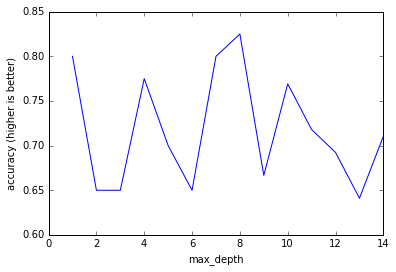

In [252]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# plot max_depth (x-axis) vs MSE (y-axis)
plt.plot(max_depth_range, MSE_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy (higher is better)')

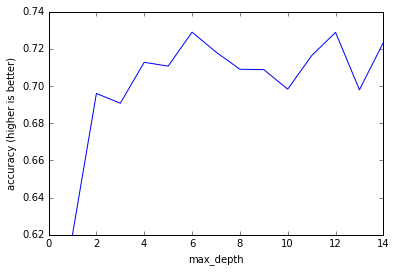

In [250]:
# try different tree depths
max_depth_range = range(1,15)

# store the average RMSE for each max_depth
RMSE_scores = []

# LOOCV with each max_depth
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(criterion='gini', max_features=10, max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
    RMSE_scores.append(np.mean(MSE_scores))

# plot max_depth (x-axis) vs RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy (higher is better)')

In [253]:
# instantiate a DecisionTreeClassifier with dept of 12 because that had higheset accuracy
from sklearn.tree import DecisionTreeClassifier
treereg = DecisionTreeClassifier(max_depth=12, random_state=1)
treereg.fit(X, y)
my_prediction = treereg.predict(X)

In [254]:
# use leave-one-out cross-validation (LOOCV) to estimate the MSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.52660340029246

In [256]:
# Gini importance of each feature (normalized total reduction of error brought by that feature)
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,male,0.074539
1,book1,0.046324
2,book2,0.074955
3,book3,0.050062
4,book4,0.094636
5,book5,0.030436
6,isMarried,0.058449
7,isNoble,0.060987
8,numDeadRelations,0.057578
9,boolDeadRelations,0.005028


In [258]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_GOT.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_GOT.dot -o tree_GOT.png

In [259]:
# Compare original prediction accuracy
url = '/Users/ibt119/Code/datascienceclass/sfdat22_work/project/character-predictions-9.csv'
df = pd.read_csv(url, sep=',')

((df['alive'] >= .5) == df['isAlive']).mean()

0.72875226039783003

In [260]:
# read the testing data
# url = '/Users/ibt119/Code/datascienceclass/sfdat22_work/project/character-predictions-9.csv'
# test = pd.read_csv(url)
# test['isAlive'] = test.alive.map({'dead':0, 'alive':1})
# test

In [261]:
# use fitted model to make predictions on testing data
X_test = test[feature_cols]
y_test = test.isAlive
y_pred = treereg.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1,

In [262]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# TODO
# and gini index, feature importances
# Find out what types of people george rr martin hates


# Old code

# visualization
# import seaborn as sns 
# import matplotlib.pyplot as plt 
# %matplotlib inline

# Q: Which house has the most characters? What's the ratio of alive vs dead per house? (Ranked by total # of characters per house) 
# A: Night's Watch has the most characters. Night's Watch and Targaryen have the most dead. 
# df.loc[:, "house"] = [get_house(x) for x in df.house.fillna("")]
# data = df.groupby(["house", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
# data.loc[:, "total"]= data.sum(axis = 1)
# p = data[data.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked = True, rot = 0, figsize = (14, 12),)
# _ = p.set_ylabel("House"), p.set_xlabel("No. of Characters"), p.legend(["Dead", "Alive"], fontsize = 12., loc = "lower right")

# scatter plot in Seaborn
# sns.pairplot(df, x_vars=['isNoble','popularity','house'], y_vars='isAlive', size=3, aspect=1)

# Consolidate variations on houses
# consolhouse = {
#    'Baratheon': ['House Baratheon', 'House Baratheon of King"\'"s Landing', 'House Baratheon of Dragonstone'],
#    'Bolton': ['House Bolton', 'House Bolton of the Dreadfort'],
#    'Frey': ['House Frey', 'House Frey of Riverrun'],
#    'Lannister': ['House Lannister', 'House Lannister of Casterly Rock', 'House Lannister of Lannisport'],
#    'Tyrell': ['House Tyrell', 'House Tyrell of Brightwater Keep'],
#}

# Check how many houses there are to see if it makes sense to manually convert to numbers
#df.house.value_counts()

# Fill in blank houses
# housenum = pd.get_dummies(data=df.house, dummy_na=True)
# df = pd.concat([df, namenum], axis = 1)

# View database to see filled in blanks
#df

# group by house
# df = df.reset_index()
# df = df.set_index('house')
# df.groupby('house').sum()

# Convert house column to category data type
# df['housenumber'] = df['house'].astype('category') 
# df.dtypes

# Use select_dtypes to select column
# cat_columns = df.select_dtypes(['category']).columns
# cat_columns

# apply .cat.codes to column to turn it into a number
# df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
# df.dtypes
# df

# df.house.value_counts()
# df[['house', 'housenumber']]

# df.groupby('house').housenumber.count()